# Module 6 Section 1 Lab 1 - K-Nearest Neighbors
*k-Nearest Neighbors* (k-NN) merupakan salah satu algoritma *supervised learning* dimana hasil dari *instance* yang baru diklasifikasikan berdasarkan mayoritas dari kategori $k$-tetangga terdekat. k-NN termasuk metode *lazy learning* hanya menyimpan contoh proses pelatihan dan menunda generalisasi (membangun model) hingga *instance* baru harus diklasifikasikan atau dibuat prediksinya. k-NN dapat digunakan untuk tugas klasifikasi dan regresi. k-NN adalah pengklasifikasi berbasis jarak, artinya secara implisit mengasumsikan bahwa semakin kecil jarak antara 2 titik, semakin mirip mereka.

KNN memiliki langkah-langkah dasar berikut:
1. Tentukan nilai $k$. Penentuan nilai ini bergantung dari sebaran data. Jika sebaran data rapat dan memiliki *outliers*, maka pilih nilai $k$ yang kecil. Sedangkan jika sebaran data lebar, maka lebih baik memilih nilai $k$ yang besar.
2. Hitung jarak.
3. Temukan tetangga terdekat. Misalnya, kita menentukan $k=5$. Kita perlu menemukan 5 tetangga terdekat terhadap titik data baru berdasarkan *Euclidean Distance*. 
4. Lakukan voting. Hitung berapa jumlah data dari masing-masing kategori yang menjadi tetangga (neighbor) titik data baru.
5. Klasifikasikan. Masukkan titik data baru ke kategori dengan jumlah data (yang menjadi tetangga titik data baru) terbanyak.

<center><img src='https://github.com/ksnugroho/ai-mastery/blob/main/assets/steps-of-knn.png?raw=true' width=600></img></center>

## Menentukan Nilai K yang Optimal
- Tidak ada metode statistik untuk menemukan nilai $k$ yang paling optimal.
- Inisialisasi nilai $k$ secara acak dan mulai komputasi.
- Memilih nilai $k$ yang kecil menyebabkan batas keputusan yang tidak stabil.
- Kita bisa membuat grafik antara tingkat kesalahan (error rate) dan $k$ yang menunjukkan nilai dalam rentang yang ditentukan. Kemudian pilih nilai $k$ yang memiliki tingkat kesalahan minimum.

## Proses Fitting Model
k-NN unik dibandingkan dengan algoritma lain karena hampir tidak melakukan apa pun selama langkah proses 'fit', dan semua pekerjaan selama langkah 'prediksi'. Selama langkah 'fit', k-NN hanya menyimpan semua data pelatihan dan nilai yang sesuai. Tidak ada jarak yang dihitung pada titik ini.

## Proses Voting
Cara memutuskan voting:
- Saat melakukan klasifikasi biner, sering gunakan nilai $k$ ganjil untuk menghindari kebingungan menentukan hasilnya.
- Untuk masalah klasifikasi multiclass, kurangi $k$ sebanyak 1 untuk melihat siapa yang menang. Ingat ya, bobot suara berdasarkan jarak tetangga.

## Notasi
Dalam ruang dua dimensi, koordinat diberikan sebagai titik pada sumbu x dan y adalah:

$$d=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$

<center><img src='https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/assets/euclidean-distance.png'></img></center>








In [110]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
X = data.iloc[:,:-1]
y = data.iloc[:,8:]

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [113]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
350,4,92,80,0,0,42.2,0.237,29
470,1,144,82,40,0,41.3,0.607,28
462,8,74,70,40,49,35.3,0.705,39
475,0,137,84,27,0,27.3,0.231,59
41,7,133,84,0,0,40.2,0.696,37
...,...,...,...,...,...,...,...,...
346,1,139,46,19,83,28.7,0.654,22
374,2,122,52,43,158,36.2,0.816,28
216,5,109,62,41,129,35.8,0.514,25
511,0,139,62,17,210,22.1,0.207,21


In [114]:
'''
Standardize features by removing the mean and scaling to unit variance.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [115]:
X_train

array([[ 0.03413896, -0.88274152,  0.55866165, ...,  1.32083043,
        -0.71056705, -0.37840264],
       [-0.8734322 ,  0.7019078 ,  0.66931816, ...,  1.20107205,
         0.41513393, -0.46175252],
       [ 1.24423384, -1.43127397,  0.00537914, ...,  0.40268291,
         0.71329257,  0.4550961 ],
       ...,
       [ 0.33666268, -0.36468309, -0.43724688, ...,  0.46921534,
         0.13218747, -0.71180214],
       [-1.17595592,  0.54953768, -0.43724688, ..., -1.35377322,
        -0.8018401 , -1.04520164],
       [ 1.54675756,  0.0924273 ,  0.00537914, ...,  0.41598939,
        -0.57365747,  0.03834673]])

In [116]:
'''
Classifier implementing the k-nearest neighbors vote.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())

y_pred = knn.predict(X_test)

print('Akurasi pada data uji', accuracy_score(y_test, y_pred), '\n')
print('Classification report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

Akurasi pada data uji 0.640625 

Classification report
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       122
           1       0.51      0.44      0.47        70

    accuracy                           0.64       192
   macro avg       0.61      0.60      0.60       192
weighted avg       0.63      0.64      0.63       192

Confusion Matrix
 [[92 30]
 [39 31]]


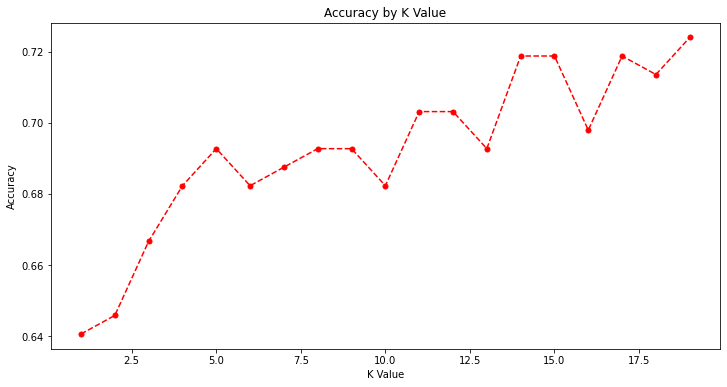

In [117]:
# Mencari nilai K optimal berdasarkan akurasi
import matplotlib.pyplot as plt  

k_range = list(range(1, 20))
k_acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())

    y_pred= knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    k_acc.append(score)

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_acc, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 
plt.show()

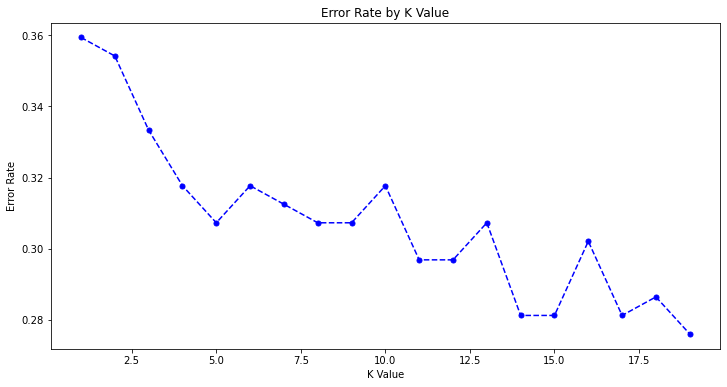

In [118]:
# Mencari nilai K optimal berdasarkan error rate (kesalahan klasifikasi)

error_rate = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train.values.ravel())

  y_pred = knn.predict(X_test)
  y_pred = y_pred.reshape(len(X_test),1)
  error_rate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(12, 6))  
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Error Rate by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Error Rate') 
plt.show()

In [121]:
# Retrain dengan nilai K Baru

knn_new = KNeighborsClassifier(n_neighbors=19)
knn_new.fit(X_train, y_train.values.ravel())

y_pred_new = knn_new.predict(X_test)

print('Akurasi pada data uji', accuracy_score(y_test, y_pred_new), '\n')
print('Classification report\n', classification_report(y_test, y_pred_new))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_new))

Akurasi pada data uji 0.7239583333333334 

Classification report
               precision    recall  f1-score   support

           0       0.73      0.90      0.81       122
           1       0.71      0.41      0.52        70

    accuracy                           0.72       192
   macro avg       0.72      0.66      0.66       192
weighted avg       0.72      0.72      0.70       192

Confusion Matrix
 [[110  12]
 [ 41  29]]
